<a href="https://colab.research.google.com/github/absolutemocha/sdaai/blob/main/C2329C_AY2022_T3_CWF_Lim_Zhao_Hong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C2329C Machine Learning Fundamentals

## Coursework Final
***
### Student Name: $<Lim Zhao Hong>$ 
### Student ID: $<20065320>$

***

## Features description from the $CleandDataV20210515.csv$ file:

**index_col** time step for the washing cycle

**avC:** average current 

**avP:** average power

**avR:** average resistant

**maxC:** maximum current 

**maxP:** maximum power

**sdC:** standard deviation for current

**sdP:** standard deviation for power

**stdCR:** standard deviation for resistant

**stdCP:** standard deviation for power

**AvRR:** average relative resistance to previous resistance reading

**mode:** positive class: Daily Wash | negative class: Not Daily Wash


In [ ]:
# Import necessary Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import library to access google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#Grant access to file in google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Data Preparation Process

In [ ]:
#Data link in google drive
fileDownloaded = drive.CreateFile({'id':'1jOG2UnniYBiMzB2vEszHXRjkIOzGR3Gq'})
fileDownloaded.GetContentFile('CleandDataV20210515.csv')

In [ ]:
import pandas as pd
data = pd.read_csv('CleandDataV20210515.csv', sep=',')

data.head()

,Unnamed: 0,mode,index_col,avC,avP,sdC,sdP,avR,maxC,maxP,stdCR,stdCP,AvRR
0,0,DailyWash,0,2.225000,474.533333,3.011970,706.975234,641.340763,7.15,1632,3.011970,706.975234,641.340763
1,1,DailyWash,1,2.170200,462.000000,2.974442,700.150305,679.240121,7.18,1656,2.993026,707.624834,736.089159
2,2,DailyWash,2,3.277750,723.400000,3.327151,786.046969,503.949590,7.20,1659,3.093103,735.333466,211.798705
3,3,DailyWash,3,3.514900,778.690000,3.339524,790.007514,443.911955,7.19,1648,3.301263,786.483330,203.761414
4,4,DailyWash,4,3.012417,658.825000,3.248720,769.232288,468.640063,0.61,76,0.138488,18.963955,592.280603


In [ ]:
data.head(1).T

,0
Unnamed: 0,0
mode,DailyWash
index_col,0
avC,2.225
avP,474.533333
sdC,3.01197
sdP,706.975234
avR,641.340763
maxC,7.15
maxP,1632


In [ ]:
data.dtypes

Unnamed: 0      int64
mode           object
index_col       int64
avC           float64
avP           float64
sdC           float64
sdP           float64
avR           float64
maxC          float64
maxP            int64
stdCR         float64
stdCP         float64
AvRR          float64
dtype: object

Mode is identified as the target. Therefore we would select mode as y data and drop mode in x data

In [ ]:
# Get a list of all the columns that don't contain the label

x_cols = [x for x in data.columns if x != 'mode']

x_data = data[x_cols]
print (x_data)

      Unnamed: 0  index_col       avC         avP       sdC         sdP  \
0              0          0  2.225000  474.533333  3.011970  706.975234   
1              1          1  2.170200  462.000000  2.974442  700.150305   
2              2          2  3.277750  723.400000  3.327151  786.046969   
3              3          3  3.514900  778.690000  3.339524  790.007514   
4              4          4  3.012417  658.825000  3.248720  769.232288   
...          ...        ...       ...         ...       ...         ...   
1026          12         12  0.497351   68.908108  0.457768   72.386738   
1027          13         13  0.484075   66.747500  0.445371   70.431137   
1028          14         14  0.467512   64.206977  0.435940   68.820644   
1029          15         15  0.466289   64.042222  0.428875   67.693074   
1030          16         16  0.496708   68.904167  0.462365   73.301214   

              avR  maxC  maxP     stdCR       stdCP         AvRR  
0      641.340763  7.15  1632  3

In [ ]:
x_data.columns

Index(['Unnamed: 0', 'index_col', 'avC', 'avP', 'sdC', 'sdP', 'avR', 'maxC',
       'maxP', 'stdCR', 'stdCP', 'AvRR'],
      dtype='object')

Visualize the relationship between the variables.

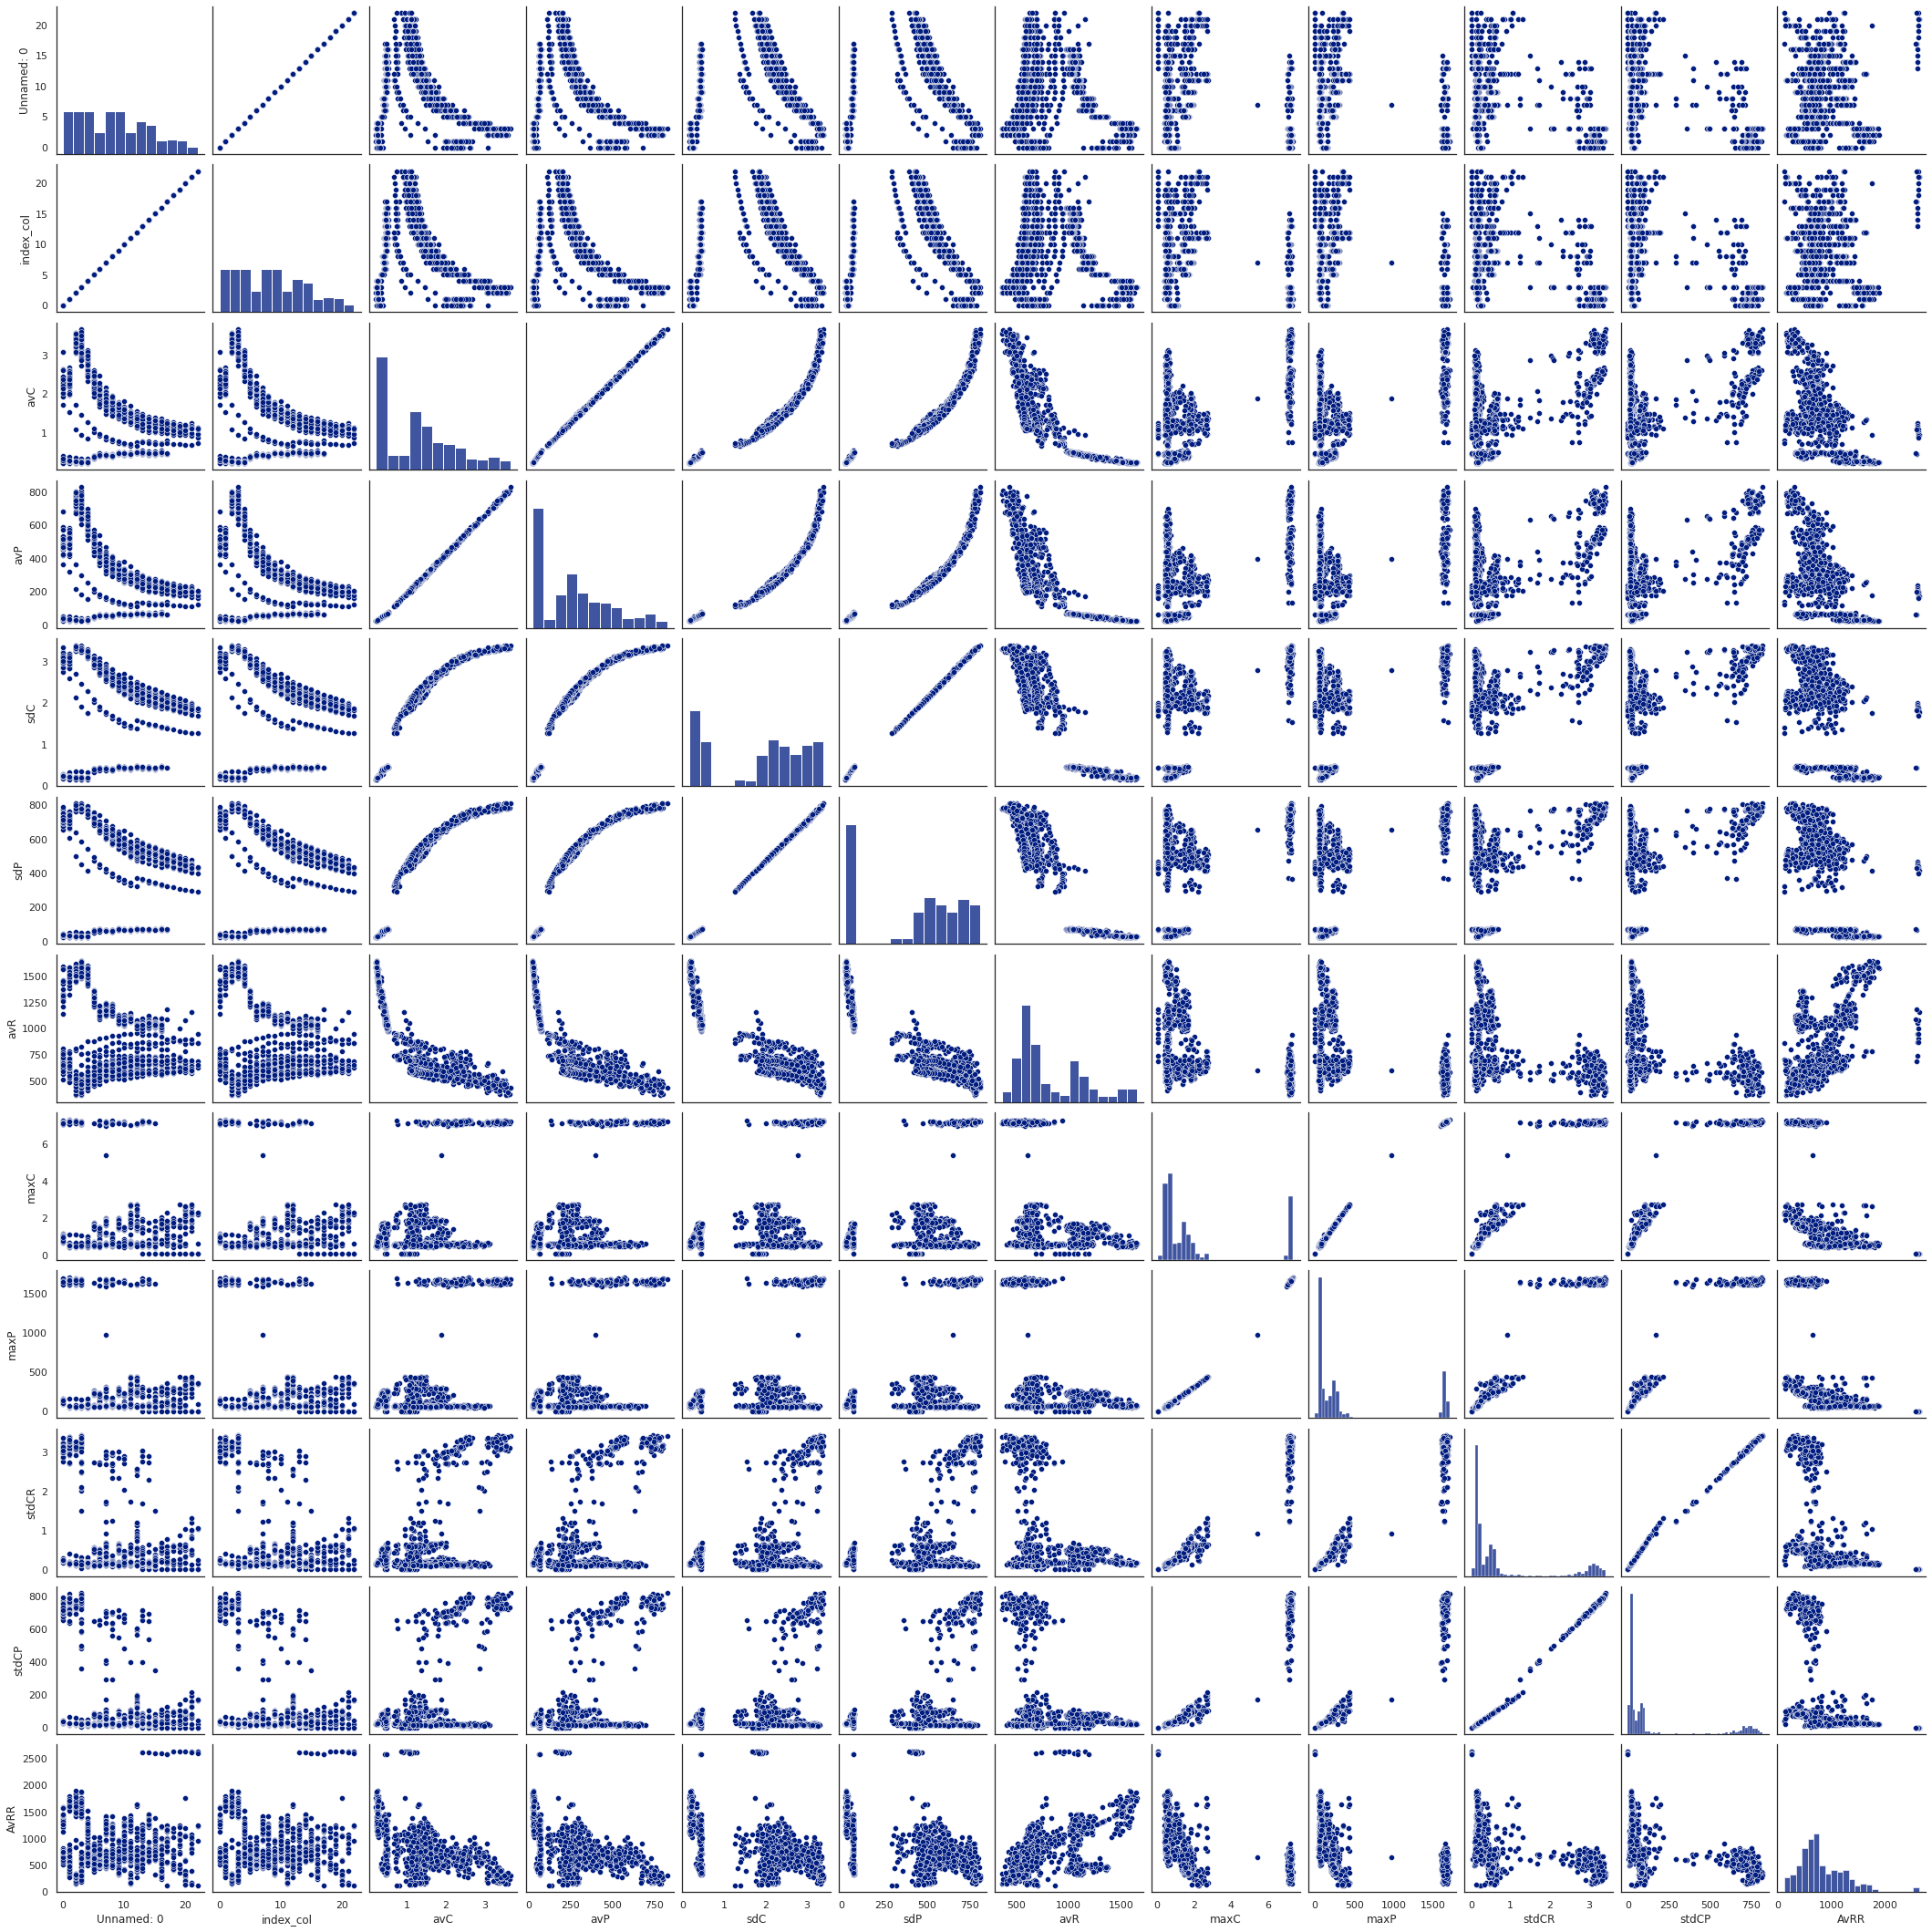

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_context('notebook')
sns.set_palette('dark')
sns.set_style('white')

sns.pairplot(data);


***

In [ ]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

X_data = pd.DataFrame(msc.fit_transform(x_data),  # this is an np.array, not a dataframe.
                    columns=x_data.columns)

Label Encode y_data ('mode)

In [ ]:

y_data = data['mode']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_data = le.fit_transform(y_data)

y_data


array([8, 8, 8, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)

In [ ]:
print (X_data)

      Unnamed: 0  index_col       avC       avP       sdC       sdP       avR  \
0       0.000000   0.000000  0.582733  0.562153  0.878526  0.866351  0.215837   
1       0.045455   0.045455  0.566889  0.546613  0.867005  0.857709  0.245561   
2       0.090909   0.090909  0.887111  0.870718  0.975286  0.966481  0.108082   
3       0.136364   0.136364  0.955677  0.939271  0.979085  0.971496  0.060994   
4       0.181818   0.181818  0.810396  0.790653  0.951208  0.945188  0.080388   
...          ...        ...       ...       ...       ...       ...       ...   
1026    0.545455   0.545455  0.083225  0.059227  0.094391  0.062762  0.516744   
1027    0.590909   0.590909  0.079387  0.056548  0.090585  0.060285  0.525071   
1028    0.636364   0.636364  0.074598  0.053398  0.087690  0.058246  0.541944   
1029    0.681818   0.681818  0.074244  0.053194  0.085521  0.056818  0.529064   
1030    0.727273   0.727273  0.083039  0.059222  0.095802  0.063920  0.527438   

          maxC      maxP   

## Predictive models : K-Nearest Neigbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

In [ ]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

print(accuracy(y_test, y_test_pred))

0.867741935483871


In [ ]:
## Fit the K-nearest neighbors model again with n_neighbors=3 but this time use distance for the weights. Calculate the accuracy using the function you created above.
knn = KNeighborsClassifier(n_neighbors=5, p=1)

knn = knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

print(accuracy(y_test, y_test_pred))

0.8387096774193549


Finetuning for K-Nearest Neigbors and label it as **knn_l1**

In [ ]:
## Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (p=1) i.e. Manhattan Distance.
knn_l1 = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn_l1 = knn_l1.fit(X_train, y_train)

y_test_pred = knn_l1.predict(X_test)

print(accuracy(y_test, y_test_pred))

0.864516129032258



***

##Predictive models : Logistic Regression 

In [ ]:
print(data['mode'])

0         DailyWash
1         DailyWash
2         DailyWash
3         DailyWash
4         DailyWash
           ...     
1026    BeddingSpin
1027    BeddingSpin
1028    BeddingSpin
1029    BeddingSpin
1030    BeddingSpin
Name: mode, Length: 1031, dtype: object


In [ ]:
data.dtypes

Unnamed: 0      int64
mode           object
index_col       int64
avC           float64
avP           float64
sdC           float64
sdP           float64
avR           float64
maxC          float64
maxP            int64
stdCR         float64
stdCP         float64
AvRR          float64
dtype: object

In [ ]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import LogisticRegression


# Standard logistic regression
%time lr = LogisticRegression().fit(X_train, y_train)

CPU times: user 67.2 ms, sys: 1.99 ms, total: 69.2 ms
Wall time: 70.9 ms


Finetuning for logistic regression and label it as **lr_l1**

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
%time lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

CPU times: user 28.7 s, sys: 33.7 ms, total: 28.7 s
Wall time: 29.9 s


Finetuning for logistic regression and label it as **lr_l2**

In [ ]:
# L2 regularized logistic regression
%time lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2').fit(X_train, y_train)

CPU times: user 1.3 s, sys: 5.96 ms, total: 1.31 s
Wall time: 1.3 s


In [ ]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr','lr_l1','lr_l2','knn','knn_l1']
coeff_models = [lr, lr_l1, lr_l2, knn, knn_l1]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

In [ ]:
from sklearn import pipeline, feature_selection, linear_model, preprocessing, metrics, model_selection

first_pipe = pipeline.Pipeline([
    ("scale", preprocessing.StandardScaler()),
    ("selection", feature_selection.SelectPercentile(feature_selection.f_regression, percentile=50)),
    ("regression", linear_model.LinearRegression()),
])

second_pipe = pipeline.Pipeline([
    ("scale", preprocessing.StandardScaler()),
    ("selection", feature_selection.SelectPercentile(feature_selection.f_regression, percentile=50)),
    ("regression", linear_model.Lasso(alpha=40)),
])

first_pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('selection', SelectPercentile(percentile=50,
                    score_func=<function f_regression at 0x7fc5999f53b0>)),
  ('regression', LinearRegression())],
 'verbose': False,
 'scale': StandardScaler(),
 'selection': SelectPercentile(percentile=50,
                  score_func=<function f_regression at 0x7fc5999f53b0>),
 'regression': LinearRegression(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'selection__percentile': 50,
 'selection__score_func': <function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True)>,
 'regression__copy_X': True,
 'regression__fit_intercept': True,
 'regression__n_jobs': None,
 'regression__normalize': 'deprecated',
 'regression__positive': False}

Calculate the following metrics for each model using test dataset
---
* Accuracy
* Precision
* Recall
* F1 score

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
       
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy},
                              #'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

metrics

,lr,lr_l1,lr_l2,knn,knn_l1
precision,0.689775,0.800995,0.864523,0.844561,0.869322
recall,0.716129,0.703226,0.864516,0.838710,0.864516
fscore,0.666156,0.720180,0.864127,0.839577,0.865811
accuracy,0.716129,0.703226,0.864516,0.838710,0.864516


Generating Confusion Matrix
---
Display or plot the confusion matrix for each model.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

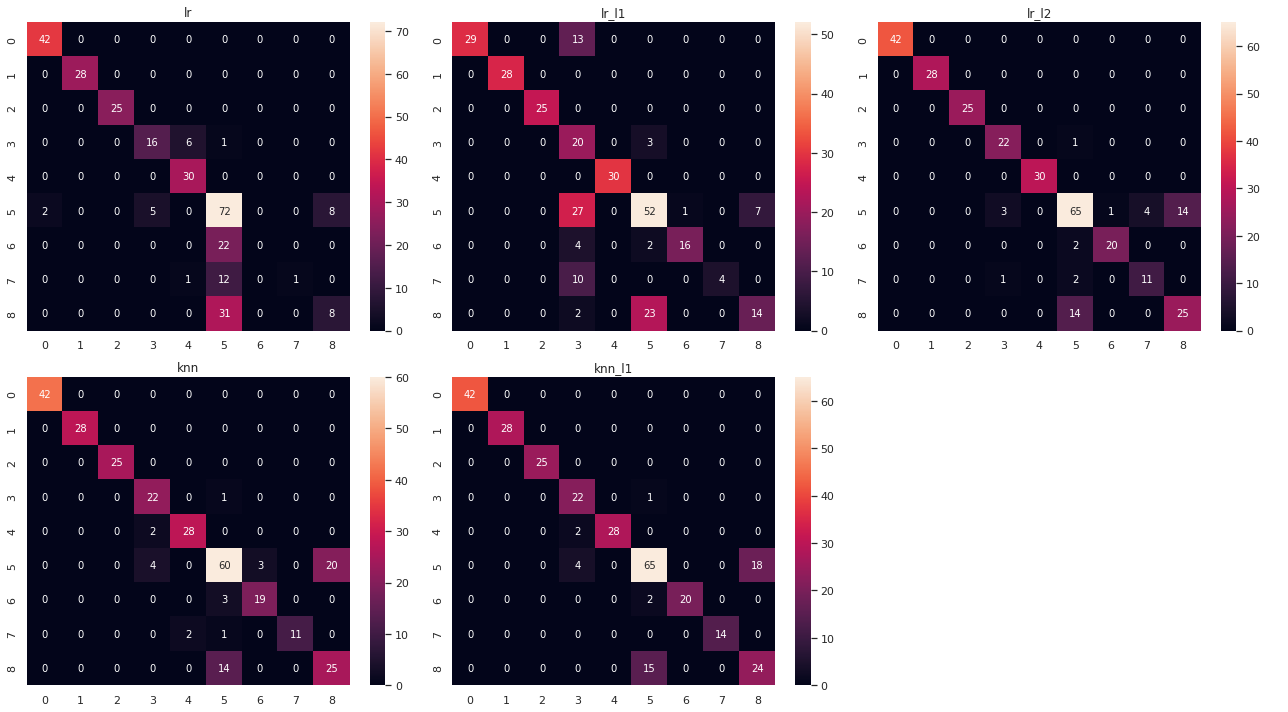

In [ ]:
fig, axList = plt.subplots(nrows=2, ncols=3)
axList = axList.flatten()
fig.set_size_inches(18, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

Confusion matrix is used to evaluate the accuracy of a classification. Using this table it is easy to see which predictions are wrong. From the firs glance, it appear that lr_l2 has more predictions which are right (eg. 0 belong to 0, 1 belong to 1)

Learning Curve
---
To know if we are overfit or underfit, we need to plot a learning curve. A learning curve plots performance (either error or score) against some measure of complexity.



***

In [ ]:
from sklearn import pipeline, feature_selection, linear_model, preprocessing, metrics, model_selection

first_pipe = pipeline.Pipeline([
    ("scale", preprocessing.StandardScaler()),
    ("selection", feature_selection.SelectPercentile(feature_selection.f_regression, percentile=50)),
    ("regression", linear_model.LinearRegression()),
])

second_pipe = pipeline.Pipeline([
    ("scale", preprocessing.StandardScaler()),
    ("selection", feature_selection.SelectPercentile(feature_selection.f_regression, percentile=50)),
    ("regression", linear_model.Lasso(alpha=40)),
])

first_pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('selection', SelectPercentile(percentile=50,
                    score_func=<function f_regression at 0x7fc5999f53b0>)),
  ('regression', LinearRegression())],
 'verbose': False,
 'scale': StandardScaler(),
 'selection': SelectPercentile(percentile=50,
                  score_func=<function f_regression at 0x7fc5999f53b0>),
 'regression': LinearRegression(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'selection__percentile': 50,
 'selection__score_func': <function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True)>,
 'regression__copy_X': True,
 'regression__fit_intercept': True,
 'regression__n_jobs': None,
 'regression__normalize': 'deprecated',
 'regression__positive': False}

In [ ]:
p_list = np.linspace(1, 100, 25, dtype='int')
train_score = []
test_score = []

for i, p in enumerate(p_list):

    first_pipe.set_params(selection__percentile=p)
    #second_pipe.set_params(selection__percentile=p)

    score = model_selection.cross_validate(
        first_pipe,
        X_train,
        y_train,
        scoring="r2",
        cv=5,
        return_train_score=True)

    train_score.append(score['train_score'].mean())
    test_score.append(score['test_score'].mean())
print(max(test_score))

0.8222227067987884


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mod', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


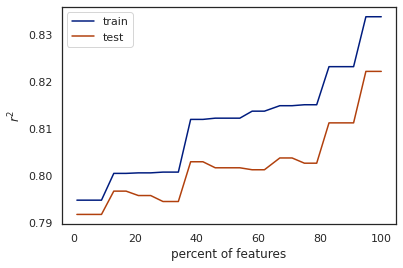

In [ ]:
%pylab inline


plt.plot(p_list, train_score, label='train')
plt.plot(p_list, test_score, label='test')
plt.ylabel("$r^2$")
plt.xlabel("percent of features")
plt.legend();
plt.show();

Perform 10 fold cross validation and check for accuracy

In [ ]:
# evaluate a knn model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
#X_train, y_train = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = knn
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.838 (0.051)


In [ ]:
# evaluate knn_l1 model using k-fold cross-validation

cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = knn_l1
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.849 (0.052)


In [ ]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = lr
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.707 (0.037)


In [ ]:
# evaluate logistic regression L1 model using k-fold cross-validation

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = lr_l1
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.721 (0.061)


In [ ]:
# evaluate logistic regression L2 model using k-fold cross-validation

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = lr_l2
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.856 (0.034)


# Conclusion <br>
2 models (K-Nearest Neigbors and Logistic Regression) are used in this evaluation. With further finetuning, it is assessed that **[Lr_l2]** (logistic regression model 2) has the highest accuracy (0.856)